In [31]:
!pip install tensorflow opencv-python matplotlib streamlit pandas pydot

In [32]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altair                        5.3.0
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat  

In [33]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altair                        5.3.0
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat  

In [36]:
import tensorflow as tf
import os

In [37]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [38]:
import cv2
import matplotlib
from matplotlib import pyplot as plt

In [39]:
data_train_path ='Data/Training'
data_test_path ='Data/Test'
data_vld_path ='Data/Validation'

In [40]:
os.listdir(os.path.join(data_train_path, 'm4%'))

['Screenshot 2024-04-22 172539.png',
 'Screenshot 2024-04-22 172651.png',
 'Screenshot 2024-04-22 172741.png',
 'Screenshot 2024-04-22 172902.png',
 'Screenshot 2024-04-22 173146.png',
 'Screenshot 2024-04-22 173300.png',
 'Screenshot 2024-04-22 173349.png',
 'Screenshot 2024-04-22 173606.png',
 'Screenshot 2024-04-22 173707.png',
 'Screenshot 2024-04-22 174259.png',
 'Screenshot 2024-04-22 174326.png',
 'Screenshot 2024-04-22 174419.png',
 'Screenshot 2024-04-22 174439.png',
 'Screenshot 2024-04-22 174853.png',
 'Screenshot 2024-06-30 221630.png',
 'Screenshot 2024-06-30 221645.png',
 'Screenshot 2024-06-30 221800.png',
 'Screenshot 2024-06-30 221842.png',
 'Screenshot 2024-06-30 221858.png',
 'Screenshot 2024-06-30 222311.png']

In [41]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [42]:
img_width=180
img_height=180

In [43]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [44]:
data_train_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [45]:


data_train =data_train_gen.flow_from_directory(
    data_train_path,
    shuffle=True,
    target_size=(img_height,img_width),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

Found 481 images belonging to 36 classes.


In [46]:
data_categories = list(data_train.class_indices.keys())
print(data_categories)

['f10-12%', 'f13-15%', 'f16-18%', 'f19-21%', 'f22-24%', 'f25-27%', 'f28-30%', 'f31-33%', 'f34-36%', 'f37-39%', 'f40-42%', 'f43-45%', 'f46-48%', 'f49-51%', 'f52-54%', 'm11-12%', 'm13-14%', 'm15-16%', 'm17-18%', 'm19-20%', 'm21-22%', 'm23-24%', 'm25-26%', 'm27-28%', 'm29-30%', 'm3%', 'm31-32%', 'm33-34%', 'm35-36%', 'm37-38%', 'm39-40%', 'm4%', 'm41-42%', 'm5-6%', 'm7-8%', 'm9-10%']


In [47]:
data_vld_gen=ImageDataGenerator()

data_vld =data_vld_gen.flow_from_directory(
    data_vld_path,
    shuffle=True,
    target_size=(img_height,img_width),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

Found 259 images belonging to 36 classes.


In [48]:
data_test =tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_height,img_width),
    batch_size=32,
    validation_split=False
)

Found 6 files belonging to 34 classes.


In [49]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Rescaling, Input
from tensorflow.keras.models import Sequential
from keras.regularizers import l2
from keras.utils import plot_model

In [50]:
model = Sequential()

model.add(Input(shape=(180, 180, 3)))
model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128,(5,5),padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(256, kernel_regularizer=l2(0.03)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(Dropout(0.4))

model.add(layers.Dense(36, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 180, 180, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 90, 90, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 90, 90, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 45, 45, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 22, 22, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 9,659,684 (36.85 MB)

 Trainable params: 9,656,996 (36.84 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [63]:
model_1 = Sequential()

model_1.add(Input(shape=(180, 180, 3)))
model_1.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model_1.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.4))

model_1.add(Conv2D(64,(5,5),padding='same', activation='relu'))
model_1.add(Conv2D(64,(5,5),padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.4))

model_1.add(Conv2D(96,(3,3),padding='same', activation='relu'))
model_1.add(Conv2D(96,(3,3),padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.4))

model_1.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model_1.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.4))

model_1.add(Flatten())

model_1.add(Dense(64))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Activation('relu'))
model_1.add(Dropout(0.4))

model_1.add(Dense(128, kernel_regularizer=l2(0.01)))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Activation('relu'))
model_1.add(Dropout(0.4))

model_1.add(layers.Dense(36, activation='softmax'))

model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 90, 90, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 90, 90, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 45, 45, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 45, 45, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 22, 22, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 22, 22, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 22, 22, 128)         │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 22, 22, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │         991,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 64)                  │              

 Total params: 1,565,636 (5.97 MB)

 Trainable params: 1,565,252 (5.97 MB)

 Non-trainable params: 384 (1.50 KB)

In [51]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

In [23]:
ep =1000
history = model.fit(data_train, validation_data=data_vld, epochs=ep, batch_size=32, callbacks=[early_stopping, checkpoint])

Epoch 1/1000


C:\Users\ag393\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.0519 - loss: 9.0721 - val_accuracy: 0.0386 - val_loss: 808.7585
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1026 - loss: 8.0137 - val_accuracy: 0.0425 - val_loss: 334.8385
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1038 - loss: 7.4128 - val_accuracy: 0.0347 - val_loss: 187.9249
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1347 - loss: 6.7629 - val_accuracy: 0.0463 - val_loss: 112.9696
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1939 - loss: 6.1611 - val_accuracy: 0.0463 - val_loss: 85.0215
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2085 - loss: 5.7068 - val_accuracy: 0.0502 - val_loss: 66.2604
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2253 - loss: 5.4159 - val_accuracy: 0.0425 - val_loss: 63.4243
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.2271 - loss: 4.9576 - val_accuracy: 0.04

Epoch 51/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9698 - loss: 0.3524 - val_accuracy: 0.2201 - val_loss: 128.6752
Epoch 52/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9676 - loss: 0.3617 - val_accuracy: 0.1776 - val_loss: 136.6301
Epoch 53/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9646 - loss: 0.3698 - val_accuracy: 0.1892 - val_loss: 135.8848
Epoch 54/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9707 - loss: 0.3574 - val_accuracy: 0.2046 - val_loss: 117.9260
Epoch 55/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9624 - loss: 0.3488 - val_accuracy: 0.1351 - val_loss: 148.7416
Epoch 56/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9645 - loss: 0.3524 - val_accuracy: 0.1699 - val_loss: 139.9317
Epoch 57/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9571 - loss: 0.3377 - val_accuracy: 0.1506 - val_loss: 163.3839
Epoch 58/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9641 - loss: 0.3

Text(0.5, 1.0, 'Loss')

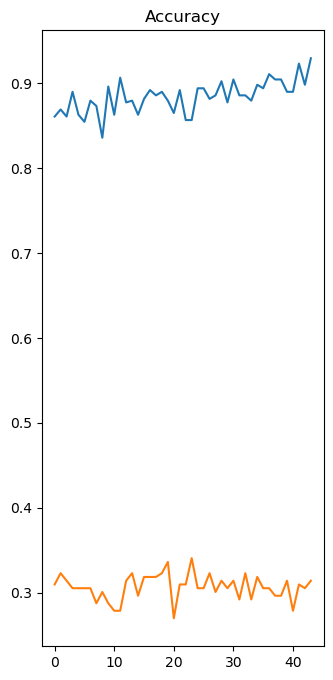

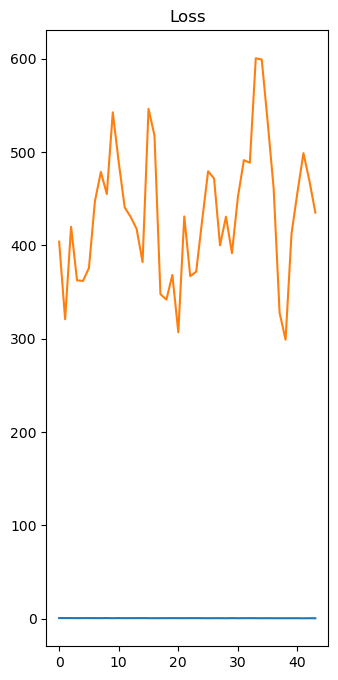

In [58]:
epochs_range=range(44)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

In [57]:
image='Screenshot 2024-09-04 1348312.png'
image=tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_bat=tf.expand_dims(img_arr,0)

In [58]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [59]:
score=tf.nn.softmax(predict)

Person in image is f34-36% with accuracy of 6.80


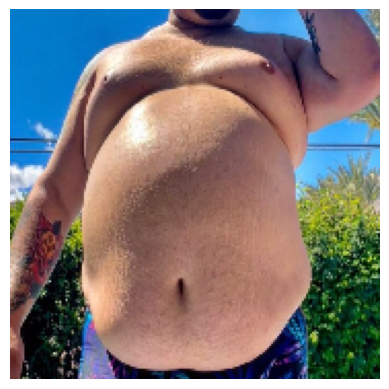

In [60]:
plt.imshow(image)
plt.axis('off')
print('Person in image is {} with accuracy of {:.2f}'.format(data_categories[np.argmax(score)], np.max(score) * 100))